In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import sqlite3

In [2]:
conn = sqlite3.connect('housing.db')
sql = conn.cursor()

In [23]:
query = ''' SELECT suburb, medianSoldPrice FROM suburb_performance_Sydney_Years
            WHERE type  == 'House' and bedrooms=3 and year =2021
            ORDER BY medianSoldPrice '''

In [11]:
query = ''' SELECT * FROM suburb_performance_Sydney_Years
            WHERE medianSoldPrice < 750000 &
            type  == 'Unit' &
            bedrooms == 2
            ORDER BY medianSoldPrice DESC'''

In [7]:
query = ''' SELECT suburb, medianSoldPrice, medianSaleListingPrice FROM suburb_performance_Sydney_Years
            WHERE medianSoldPrice < 750000 and
            type = "Unit" and
            bedrooms = 2 and
            Year = 2020
            ORDER BY medianSoldPrice DESC
            '''

In [24]:
res = sql.execute(query).fetchall()

In [90]:
query = ''' SELECT * FROM (SELECT suburb, numberSold, numberSaleListing, numberRentListing,
                   medianSoldPrice, medianSaleListingPrice, medianRentListingPrice, daysOnMarket FROM
                   suburb_performance_Sydney_Years
                   WHERE Year = 2020 and
                   type = 'Unit' and bedrooms = 2 ) tab1
                   LEFT JOIN 
                   (SELECT suburb as sub, numberSold as numSold_2021, numberSaleListing as numSaleListing_2021, 
                   numberRentListing as numRentListing_2021, medianSoldPrice as medSoldPrice_2021, 
                   medianSaleListingPrice as medSaleListingPrice_2021, medianRentListingPrice as medRentListingPrice_2021,
                   daysOnMarket as daysOnMarket_2021 FROM
                   suburb_performance_Sydney_Years
                   WHERE Year = 2021
                   and type='Unit' and bedrooms=2) tab2
                   ON tab1.suburb = tab2.sub 
                    
                   WHERE medianSoldPrice IS NOT NULL'''

In [98]:
df = pd.read_sql_query(query, conn)
df.dropna(inplace=True)
df.drop('sub',axis=1,inplace=True)

In [100]:
df[df['suburb']=='Kingsford']

,suburb,numberSold,numberSaleListing,numberRentListing,medianSoldPrice,medianSaleListingPrice,medianRentListingPrice,daysOnMarket,numSold_2021,numSaleListing_2021,...,medSoldPrice_2021,medSaleListingPrice_2021,medRentListingPrice_2021,daysOnMarket_2021,%numberSold,%numberSaleListing,%numberRentListing,%medianSoldPrice,%medianSaleListingPrice,%daysOnMarket
101,Kingsford,31,42,474.0,840000.0,780000.0,560.0,43.0,48,58,...,784000.0,779000.0,470.0,67.0,54.83871,38.095238,38.607595,-6.666667,-0.128205,55.813953


In [106]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [99]:
df['%numberSold'] = (df['numSold_2021']-df['numberSold'])/df['numberSold']*100
df['%numberSaleListing'] = (df['numSaleListing_2021']-df['numberSaleListing'])/df['numberSaleListing']*100
df['%numberRentListing'] = (df['numRentListing_2021']-df['numberRentListing'])/df['numberRentListing']*100
df['%medianSoldPrice'] = (df['medSoldPrice_2021']-df['medianSoldPrice'])/df['medianSoldPrice']*100
df['%medianSaleListingPrice'] = (df['medSaleListingPrice_2021']-df['medianSaleListingPrice'])/df['medianSaleListingPrice']*100
df['%daysOnMarket'] = (df['daysOnMarket_2021']-df['daysOnMarket'])/df['daysOnMarket']*100



In [120]:
# 10 suburbs with the largest decrease in sold price
df.sort_values('%medianSoldPrice')[['suburb','%medianSoldPrice']].iloc[0:10]

,suburb,%medianSoldPrice
69,Enfield,-7.870370
87,Haymarket,-7.812500
7,Auburn,-7.172996
101,Kingsford,-6.666667
20,Bondi Beach,-6.321401
86,Harris Park,-5.769231
14,Bellevue Hill,-4.602888
71,Epping,-4.214559
99,Kensington,-3.066813
81,Gordon,-2.702703


In [121]:
# 10 suburbs with the largest increase in sold price
df.sort_values('%medianSoldPrice', ascending=False)[['suburb','%medianSoldPrice']].iloc[0:10]

,suburb,%medianSoldPrice
68,Elizabeth Bay,19.848901
57,Darlinghurst,16.000000
53,Crows Nest,14.382239
97,Jannali,13.565217
9,Balgowlah,13.294798
30,Cammeray,13.197970
96,Jamisontown,12.647059
15,Belmore,11.956522
70,Engadine,11.694915
26,Brookvale,10.617284


In [125]:
# 10 suburbs with the largest decrease in sale listing price
df.sort_values('%medianSaleListingPrice', ascending=True)[['suburb','%medianSaleListingPrice']].iloc[0:10]
# Note the suburbs where medianSaleListingPrice has decreased the largest is not the same as where medianSoldPrice 
# has decreased the largest. This might be due to lag between listing and sale, these surburbs in future might experience more 
# decrease in sold prices

,suburb,%medianSaleListingPrice
14,Bellevue Hill,-19.934641
32,Camperdown,-14.086957
56,Darling Point,-12.500000
68,Elizabeth Bay,-10.769231
53,Crows Nest,-10.098522
82,Granville,-10.000000
69,Enfield,-8.000000
87,Haymarket,-7.931034
71,Epping,-6.132666
86,Harris Park,-5.555556


In [126]:
# 10 suburbs with the largest increase in sale listing price
df.sort_values('%medianSaleListingPrice', ascending=False)[['suburb','%medianSaleListingPrice']].iloc[0:10]
# Note the suburbs where medianSaleListingPrice has increased the largest is not the same as where medianSoldPrice 
# has increased the largest. This might be due to lag between listing and sale, these surburbs in future might experience more 
# increase in sold prices

,suburb,%medianSaleListingPrice
66,Eastwood,19.373219
97,Jannali,12.093023
96,Jamisontown,11.461318
73,Erskineville,10.526316
10,Balmain,9.000000
78,Freshwater,8.974359
1,Alexandria,8.192771
9,Balgowlah,7.594937
26,Brookvale,6.329114
45,Chiswick,5.000000


In [138]:
# What are the suburbs where there is too much supply but less demand
# too much supply indicated by increase in number of sale listings, increase in the number of days on market
# if number of saleListings increase but numberSold decrease this is the worst

df['high_supply_low_demand']  = np.maximum(df['%numberSaleListing'],0.0)*np.maximum(df['%daysOnMarket'],0.0)
df['high_supply_high_demand'] = -1.0*np.maximum(df['%numberSaleListing'],0.0)*np.minimum(df['%daysOnMarket'],0.0)
df['low_supply_high_demand']  = np.minimum(df['%numberSaleListing'],0.0)*np.minimum(df['%daysOnMarket'],0.0)
df['low_supply_low_demand']   = -1.0*np.minimum(df['%numberSaleListing'],0.0)*np.maximum(df['%daysOnMarket'],0.0)


#df.sort_values('oversupply',ascending=False)

In [139]:
df.sort_values('high_supply_low_demand',ascending=False)

,suburb,numberSold,numberSaleListing,numberRentListing,medianSoldPrice,medianSaleListingPrice,medianRentListingPrice,daysOnMarket,numSold_2021,numSaleListing_2021,numRentListing_2021,medSoldPrice_2021,medSaleListingPrice_2021,medRentListingPrice_2021,daysOnMarket_2021,%numberSold,%numberSaleListing,%numberRentListing,%medianSoldPrice,%medianSaleListingPrice,%daysOnMarket,oversupply,undersupply,high_supply_low_demand,high_supply_high_demand,low_supply_high_demand,low_supply_low_demand
56,Darling Point,31,45,168.0,1663000.0,1600000.0,840.0,20.0,48,54,155.0,1682000.0,1400000.0,815.0,111.0,54.838710,20.000000,-7.738095,1.142514,-12.500000,455.000000,9100.000000,0.000000,9100.000000,-0.000000,0.000000,-0.000000
86,Harris Park,37,65,397.0,468000.0,450000.0,390.0,49.0,55,95,461.0,441000.0,425000.0,350.0,111.0,48.648649,46.153846,16.120907,-5.769231,-5.555556,126.530612,5839.874411,0.000000,5839.874411,-0.000000,0.000000,-0.000000
73,Erskineville,47,66,302.0,990000.0,950000.0,732.0,64.0,84,224,440.0,968000.0,1050000.0,695.0,78.0,78.723404,239.393939,45.695364,-2.222222,10.526316,21.875000,5236.742424,0.000000,5236.742424,-0.000000,0.000000,-0.000000
101,Kingsford,31,42,474.0,840000.0,780000.0,560.0,43.0,48,58,657.0,784000.0,779000.0,470.0,67.0,54.838710,38.095238,38.607595,-6.666667,-0.128205,55.813953,2126.245847,0.000000,2126.245847,-0.000000,0.000000,-0.000000
32,Camperdown,27,45,296.0,1030000.0,1150000.0,700.0,41.0,54,68,402.0,1014000.0,988000.0,625.0,55.0,100.000000,51.111111,35.810811,-1.553398,-14.086957,34.146341,1745.257453,0.000000,1745.257453,-0.000000,0.000000,-0.000000
39,Carramar,12,18,79.0,308000.0,329000.0,290.0,77.0,11,21,83.0,300000.0,340000.0,290.0,141.0,-8.333333,16.666667,5.063291,-2.597403,3.343465,83.116883,1385.281385,0.000000,1385.281385,-0.000000,0.000000,-0.000000
40,Castle Hill,37,85,246.0,780000.0,800000.0,550.0,70.0,73,101,227.0,808000.0,827000.0,530.0,94.0,97.297297,18.823529,-7.723577,3.589744,3.375000,34.285714,645.378151,0.000000,645.378151,-0.000000,0.000000,-0.000000
27,Burwood,95,186,803.0,835000.0,825000.0,590.0,88.0,121,217,1045.0,835000.0,818000.0,510.0,115.0,27.368421,16.666667,30.136986,0.000000,-0.848485,30.681818,511.363636,0.000000,511.363636,-0.000000,0.000000,-0.000000
80,Glebe,26,47,272.0,915000.0,1029000.0,673.0,60.0,36,55,299.0,955000.0,1025000.0,595.0,78.0,38.461538,17.021277,9.926471,4.371585,-0.388727,30.000000,510.638298,0.000000,510.638298,-0.000000,0.000000,-0.000000
42,Chatswood,97,151,781.0,1075000.0,1200000.0,650.0,70.0,108,168,977.0,1079000.0,1150000.0,580.0,101.0,11.340206,11.258278,25.096031,0.372093,-4.166667,44.285714,498.580889,0.000000,498.580889,-0.000000,0.000000,-0.000000


In [140]:
df.sort_values('high_supply_high_demand',ascending=False)

,suburb,numberSold,numberSaleListing,numberRentListing,medianSoldPrice,medianSaleListingPrice,medianRentListingPrice,daysOnMarket,numSold_2021,numSaleListing_2021,numRentListing_2021,medSoldPrice_2021,medSaleListingPrice_2021,medRentListingPrice_2021,daysOnMarket_2021,%numberSold,%numberSaleListing,%numberRentListing,%medianSoldPrice,%medianSaleListingPrice,%daysOnMarket,oversupply,undersupply,high_supply_low_demand,high_supply_high_demand,low_supply_high_demand,low_supply_low_demand
1,Alexandria,55,71,324.0,880000.0,830000.0,650.0,139.0,70,99,395.0,903000.0,898000.0,600.0,58.0,27.272727,39.436620,21.913580,2.613636,8.192771,-58.273381,0.000000,-0.000000,0.000000,2298.105178,-0.000000,-0.000000
38,Carlton,33,52,237.0,635000.0,630000.0,440.0,74.0,47,69,241.0,646000.0,600000.0,400.0,39.0,42.424242,32.692308,1.687764,1.732283,-4.761905,-47.297297,0.000000,-0.000000,0.000000,1546.257796,-0.000000,-0.000000
99,Kensington,60,78,542.0,913000.0,875000.0,590.0,91.0,83,97,694.0,885000.0,850000.0,500.0,51.0,38.333333,24.358974,28.044280,-3.066813,-2.857143,-43.956044,0.000000,-0.000000,0.000000,1070.724148,-0.000000,-0.000000
10,Balmain,29,36,184.0,1043000.0,1000000.0,700.0,109.0,35,45,218.0,1075000.0,1090000.0,660.0,63.0,20.689655,25.000000,18.478261,3.068073,9.000000,-42.201835,0.000000,-0.000000,0.000000,1055.045872,-0.000000,-0.000000
50,Cremorne,92,102,432.0,1085000.0,1050000.0,650.0,56.0,105,124,488.0,1163000.0,1100000.0,600.0,33.0,14.130435,21.568627,12.962963,7.188940,4.761905,-41.071429,0.000000,-0.000000,0.000000,885.854342,-0.000000,-0.000000
30,Cammeray,46,47,241.0,985000.0,1025000.0,600.0,113.0,49,52,238.0,1115000.0,998000.0,570.0,27.0,6.521739,10.638298,-1.244813,13.197970,-2.634146,-76.106195,0.000000,-0.000000,0.000000,809.640369,-0.000000,-0.000000
70,Engadine,25,35,81.0,590000.0,570000.0,420.0,47.0,51,46,83.0,659000.0,597000.0,440.0,37.0,104.000000,31.428571,2.469136,11.694915,4.736842,-21.276596,0.000000,-0.000000,0.000000,668.693009,-0.000000,-0.000000
19,Bondi,79,94,542.0,1165000.0,1100000.0,720.0,78.0,107,121,672.0,1183000.0,1100000.0,680.0,61.0,35.443038,28.723404,23.985240,1.545064,0.000000,-21.794872,0.000000,-0.000000,0.000000,626.022913,-0.000000,-0.000000
57,Darlinghurst,65,80,367.0,1375000.0,1550000.0,800.0,63.0,94,106,411.0,1595000.0,1575000.0,700.0,51.0,44.615385,32.500000,11.989101,16.000000,1.612903,-19.047619,0.000000,-0.000000,0.000000,619.047619,-0.000000,-0.000000
98,Kellyville Ridge,13,24,77.0,500000.0,500000.0,449.0,89.0,16,27,77.0,505000.0,500000.0,440.0,48.0,23.076923,12.500000,0.000000,1.000000,0.000000,-46.067416,0.000000,-0.000000,0.000000,575.842697,-0.000000,-0.000000


In [141]:
df.sort_values('low_supply_high_demand',ascending=False)

,suburb,numberSold,numberSaleListing,numberRentListing,medianSoldPrice,medianSaleListingPrice,medianRentListingPrice,daysOnMarket,numSold_2021,numSaleListing_2021,numRentListing_2021,medSoldPrice_2021,medSaleListingPrice_2021,medRentListingPrice_2021,daysOnMarket_2021,%numberSold,%numberSaleListing,%numberRentListing,%medianSoldPrice,%medianSaleListingPrice,%daysOnMarket,oversupply,undersupply,high_supply_low_demand,high_supply_high_demand,low_supply_high_demand,low_supply_low_demand
34,Canley Vale,16,33,96.0,390000.0,395000.0,320.0,153.0,12,21,96.0,405000.0,390000.0,315.0,117.0,-25.000000,-36.363636,0.000000,3.846154,-1.265823,-23.529412,0.000000,855.614973,0.000000,0.000000,855.614973,0.000000
100,Killara,45,56,141.0,875000.0,860000.0,600.0,136.0,35,48,162.0,870000.0,865000.0,550.0,60.0,-22.222222,-14.285714,14.893617,-0.571429,0.581395,-55.882353,0.000000,798.319328,0.000000,0.000000,798.319328,0.000000
72,Ermington,19,60,160.0,670000.0,687000.0,510.0,246.0,22,49,136.0,685000.0,690000.0,490.0,156.0,15.789474,-18.333333,-15.000000,2.238806,0.436681,-36.585366,0.000000,670.731707,0.000000,0.000000,670.731707,0.000000
81,Gordon,40,60,182.0,925000.0,890000.0,600.0,104.0,25,48,221.0,900000.0,900000.0,550.0,74.0,-37.500000,-20.000000,21.428571,-2.702703,1.123596,-28.846154,0.000000,576.923077,0.000000,0.000000,576.923077,0.000000
71,Epping,138,312,880.0,783000.0,799000.0,550.0,137.0,122,268,985.0,750000.0,750000.0,495.0,93.0,-11.594203,-14.102564,11.931818,-4.214559,-6.132666,-32.116788,0.000000,452.929066,0.000000,0.000000,452.929066,0.000000
69,Enfield,23,35,55.0,648000.0,650000.0,475.0,126.0,17,22,69.0,597000.0,598000.0,430.0,116.0,-26.086957,-37.142857,25.454545,-7.870370,-8.000000,-7.936508,0.000000,294.784580,0.000000,0.000000,294.784580,0.000000
14,Bellevue Hill,77,101,355.0,1108000.0,1224000.0,650.0,59.0,77,90,383.0,1057000.0,980000.0,600.0,45.0,0.000000,-10.891089,7.887324,-4.602888,-19.934641,-23.728814,0.000000,258.432623,0.000000,0.000000,258.432623,0.000000
4,Artarmon,51,63,353.0,907000.0,850000.0,575.0,55.0,56,59,471.0,896000.0,880000.0,510.0,42.0,9.803922,-6.349206,33.427762,-1.212789,3.529412,-23.636364,0.000000,150.072150,0.000000,0.000000,150.072150,0.000000
29,Cabramatta,62,123,315.0,386000.0,390000.0,320.0,151.0,68,106,356.0,395000.0,395000.0,300.0,135.0,9.677419,-13.821138,13.015873,2.331606,1.282051,-10.596026,0.000000,146.449147,0.000000,0.000000,146.449147,0.000000
24,Brighton-Le-Sands,60,82,288.0,642000.0,609000.0,460.0,161.0,64,78,316.0,655000.0,635000.0,440.0,116.0,6.666667,-4.878049,9.722222,2.024922,4.269294,-27.950311,0.000000,136.342978,0.000000,0.000000,136.342978,0.000000


In [142]:
df.sort_values('low_supply_low_demand',ascending=False)

,suburb,numberSold,numberSaleListing,numberRentListing,medianSoldPrice,medianSaleListingPrice,medianRentListingPrice,daysOnMarket,numSold_2021,numSaleListing_2021,numRentListing_2021,medSoldPrice_2021,medSaleListingPrice_2021,medRentListingPrice_2021,daysOnMarket_2021,%numberSold,%numberSaleListing,%numberRentListing,%medianSoldPrice,%medianSaleListingPrice,%daysOnMarket,oversupply,undersupply,high_supply_low_demand,high_supply_high_demand,low_supply_high_demand,low_supply_low_demand
53,Crows Nest,28,51,183.0,1036000.0,1218000.0,700.0,54.0,21,39,180.0,1185000.0,1095000.0,593.0,112.0,-25.000000,-23.529412,-1.639344,14.382239,-10.098522,107.407407,0.000000,-0.000000,0.000000,-0.000000,-0.000000,2527.233115
87,Haymarket,55,178,649.0,1280000.0,1450000.0,900.0,79.0,45,143,783.0,1180000.0,1335000.0,750.0,156.0,-18.181818,-19.662921,20.647149,-7.812500,-7.931034,97.468354,0.000000,-0.000000,0.000000,-0.000000,-0.000000,1916.512587
55,Croydon Park,27,42,210.0,565000.0,551000.0,390.0,29.0,41,39,196.0,615000.0,550000.0,360.0,90.0,51.851852,-7.142857,-6.666667,8.849558,-0.181488,210.344828,0.000000,-0.000000,0.000000,-0.000000,-0.000000,1502.463054
22,Botany,43,111,296.0,743000.0,800000.0,620.0,67.0,57,88,310.0,800000.0,799000.0,580.0,107.0,32.558140,-20.720721,4.729730,7.671602,-0.125000,59.701493,0.000000,-0.000000,0.000000,-0.000000,-0.000000,1237.057953
49,Coogee,132,143,843.0,1150000.0,1100000.0,690.0,28.0,117,121,907.0,1168000.0,1073000.0,650.0,42.0,-11.363636,-15.384615,7.591934,1.565217,-2.454545,50.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,769.230769
97,Jannali,25,39,88.0,575000.0,645000.0,510.0,60.0,23,28,56.0,653000.0,723000.0,450.0,76.0,-8.000000,-28.205128,-36.363636,13.565217,12.093023,26.666667,0.000000,-0.000000,0.000000,-0.000000,-0.000000,752.136752
17,Bexley,53,87,225.0,575000.0,580000.0,430.0,54.0,55,81,247.0,585000.0,550000.0,395.0,96.0,3.773585,-6.896552,9.777778,1.739130,-5.172414,77.777778,0.000000,-0.000000,0.000000,-0.000000,-0.000000,536.398467
82,Granville,68,158,628.0,430000.0,500000.0,400.0,105.0,85,140,779.0,462000.0,450000.0,400.0,151.0,25.000000,-11.392405,24.044586,7.441860,-10.000000,43.809524,0.000000,-0.000000,0.000000,-0.000000,-0.000000,499.095841
79,Gladesville,93,121,401.0,712000.0,720000.0,490.0,42.0,82,111,445.0,745000.0,750000.0,450.0,63.0,-11.827957,-8.264463,10.972569,4.634831,4.166667,50.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,413.223140
45,Chiswick,35,40,118.0,900000.0,900000.0,600.0,70.0,26,29,109.0,988000.0,945000.0,620.0,78.0,-25.714286,-27.500000,-7.627119,9.777778,5.000000,11.428571,0.000000,-0.000000,0.000000,-0.000000,-0.000000,314.285714


In [135]:
df['undersupply'] = np.minimum(df['%numberSaleListing'],0.0)*np.minimum(df['%daysOnMarket'],0.0)
df.sort_values('undersupply',ascending=False)

,suburb,numberSold,numberSaleListing,numberRentListing,medianSoldPrice,medianSaleListingPrice,medianRentListingPrice,daysOnMarket,numSold_2021,numSaleListing_2021,numRentListing_2021,medSoldPrice_2021,medSaleListingPrice_2021,medRentListingPrice_2021,daysOnMarket_2021,%numberSold,%numberSaleListing,%numberRentListing,%medianSoldPrice,%medianSaleListingPrice,%daysOnMarket,oversupply,undersupply
34,Canley Vale,16,33,96.0,390000.0,395000.0,320.0,153.0,12,21,96.0,405000.0,390000.0,315.0,117.0,-25.000000,-36.363636,0.000000,3.846154,-1.265823,-23.529412,0.000000,855.614973
100,Killara,45,56,141.0,875000.0,860000.0,600.0,136.0,35,48,162.0,870000.0,865000.0,550.0,60.0,-22.222222,-14.285714,14.893617,-0.571429,0.581395,-55.882353,0.000000,798.319328
72,Ermington,19,60,160.0,670000.0,687000.0,510.0,246.0,22,49,136.0,685000.0,690000.0,490.0,156.0,15.789474,-18.333333,-15.000000,2.238806,0.436681,-36.585366,0.000000,670.731707
81,Gordon,40,60,182.0,925000.0,890000.0,600.0,104.0,25,48,221.0,900000.0,900000.0,550.0,74.0,-37.500000,-20.000000,21.428571,-2.702703,1.123596,-28.846154,0.000000,576.923077
71,Epping,138,312,880.0,783000.0,799000.0,550.0,137.0,122,268,985.0,750000.0,750000.0,495.0,93.0,-11.594203,-14.102564,11.931818,-4.214559,-6.132666,-32.116788,0.000000,452.929066
69,Enfield,23,35,55.0,648000.0,650000.0,475.0,126.0,17,22,69.0,597000.0,598000.0,430.0,116.0,-26.086957,-37.142857,25.454545,-7.870370,-8.000000,-7.936508,0.000000,294.784580
14,Bellevue Hill,77,101,355.0,1108000.0,1224000.0,650.0,59.0,77,90,383.0,1057000.0,980000.0,600.0,45.0,0.000000,-10.891089,7.887324,-4.602888,-19.934641,-23.728814,0.000000,258.432623
4,Artarmon,51,63,353.0,907000.0,850000.0,575.0,55.0,56,59,471.0,896000.0,880000.0,510.0,42.0,9.803922,-6.349206,33.427762,-1.212789,3.529412,-23.636364,0.000000,150.072150
29,Cabramatta,62,123,315.0,386000.0,390000.0,320.0,151.0,68,106,356.0,395000.0,395000.0,300.0,135.0,9.677419,-13.821138,13.015873,2.331606,1.282051,-10.596026,0.000000,146.449147
24,Brighton-Le-Sands,60,82,288.0,642000.0,609000.0,460.0,161.0,64,78,316.0,655000.0,635000.0,440.0,116.0,6.666667,-4.878049,9.722222,2.024922,4.269294,-27.950311,0.000000,136.342978


In [132]:
np.minimum([1,2],0)

array([0, 0])

<IPython.core.display.Javascript object>


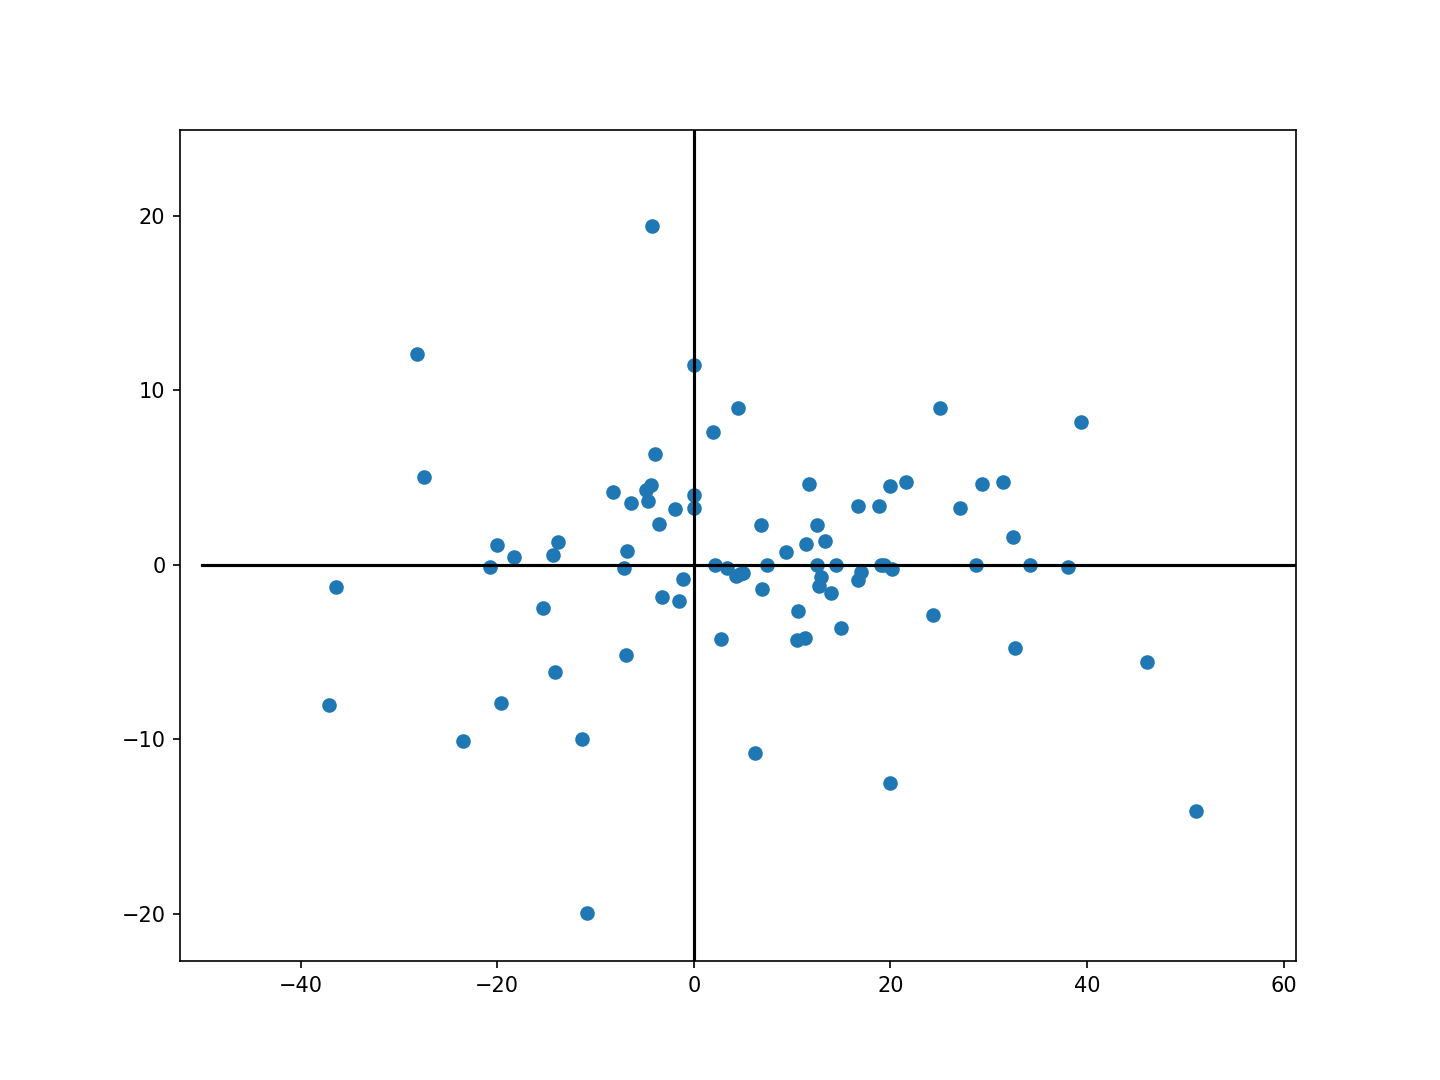

In [131]:
plt.figure()
plt.scatter(df['%numberSaleListing'],df['%medianSaleListingPrice'])
plt.plot(np.linspace(-50,250,10),np.zeros(10),'k')
plt.plot(np.zeros(10),np.linspace(-100,500,10),'k')

In [109]:
df.sort_values('%numberSaleListing')

,suburb,numberSold,numberSaleListing,numberRentListing,medianSoldPrice,medianSaleListingPrice,medianRentListingPrice,daysOnMarket,numSold_2021,numSaleListing_2021,numRentListing_2021,medSoldPrice_2021,medSaleListingPrice_2021,medRentListingPrice_2021,daysOnMarket_2021,%numberSold,%numberSaleListing,%numberRentListing,%medianSoldPrice,%medianSaleListingPrice,%daysOnMarket
69,Enfield,23,35,55.0,648000.0,650000.0,475.0,126.0,17,22,69.0,597000.0,598000.0,430.0,116.0,-26.086957,-37.142857,25.454545,-7.870370,-8.000000,-7.936508
34,Canley Vale,16,33,96.0,390000.0,395000.0,320.0,153.0,12,21,96.0,405000.0,390000.0,315.0,117.0,-25.000000,-36.363636,0.000000,3.846154,-1.265823,-23.529412
97,Jannali,25,39,88.0,575000.0,645000.0,510.0,60.0,23,28,56.0,653000.0,723000.0,450.0,76.0,-8.000000,-28.205128,-36.363636,13.565217,12.093023,26.666667
45,Chiswick,35,40,118.0,900000.0,900000.0,600.0,70.0,26,29,109.0,988000.0,945000.0,620.0,78.0,-25.714286,-27.500000,-7.627119,9.777778,5.000000,11.428571
53,Crows Nest,28,51,183.0,1036000.0,1218000.0,700.0,54.0,21,39,180.0,1185000.0,1095000.0,593.0,112.0,-25.000000,-23.529412,-1.639344,14.382239,-10.098522,107.407407
22,Botany,43,111,296.0,743000.0,800000.0,620.0,67.0,57,88,310.0,800000.0,799000.0,580.0,107.0,32.558140,-20.720721,4.729730,7.671602,-0.125000,59.701493
81,Gordon,40,60,182.0,925000.0,890000.0,600.0,104.0,25,48,221.0,900000.0,900000.0,550.0,74.0,-37.500000,-20.000000,21.428571,-2.702703,1.123596,-28.846154
87,Haymarket,55,178,649.0,1280000.0,1450000.0,900.0,79.0,45,143,783.0,1180000.0,1335000.0,750.0,156.0,-18.181818,-19.662921,20.647149,-7.812500,-7.931034,97.468354
72,Ermington,19,60,160.0,670000.0,687000.0,510.0,246.0,22,49,136.0,685000.0,690000.0,490.0,156.0,15.789474,-18.333333,-15.000000,2.238806,0.436681,-36.585366
49,Coogee,132,143,843.0,1150000.0,1100000.0,690.0,28.0,117,121,907.0,1168000.0,1073000.0,650.0,42.0,-11.363636,-15.384615,7.591934,1.565217,-2.454545,50.000000


<IPython.core.display.Javascript object>


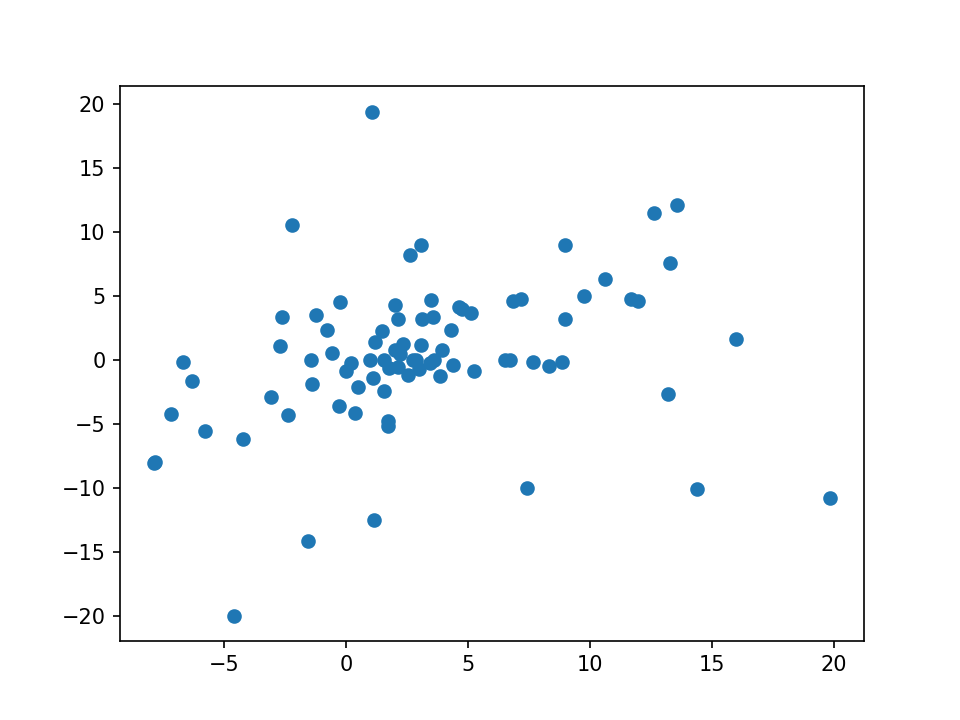

In [115]:
plt.figure()
plt.scatter(df['%medianSoldPrice'], df['%medianSaleListingPrice'])

In [59]:
res = sql.execute(query).fetchall()

In [60]:
res

[('Abbotsford',
  23,
  23,
  101.0,
  972000.0,
  990000.0,
  545.0,
  'Abbotsford',
  1,
  1,
  3.0,
  None,
  None,
  None),
 ('Abbotsford',
  23,
  23,
  101.0,
  972000.0,
  990000.0,
  545.0,
  'Abbotsford',
  25,
  24,
  92.0,
  880000.0,
  850000.0,
  495.0),
 ('Abbotsford',
  23,
  23,
  101.0,
  972000.0,
  990000.0,
  545.0,
  'Abbotsford',
  15,
  18,
  33.0,
  1335000.0,
  None,
  740.0),
 ('Abbotsford',
  20,
  21,
  39.0,
  1280000.0,
  1450000.0,
  720.0,
  'Abbotsford',
  1,
  1,
  3.0,
  None,
  None,
  None),
 ('Abbotsford',
  20,
  21,
  39.0,
  1280000.0,
  1450000.0,
  720.0,
  'Abbotsford',
  25,
  24,
  92.0,
  880000.0,
  850000.0,
  495.0),
 ('Abbotsford',
  20,
  21,
  39.0,
  1280000.0,
  1450000.0,
  720.0,
  'Abbotsford',
  15,
  18,
  33.0,
  1335000.0,
  None,
  740.0),
 ('Alexandria',
  56,
  84,
  353.0,
  640000.0,
  620000.0,
  530.0,
  'Alexandria',
  9,
  21,
  63.0,
  None,
  1500000.0,
  750.0),
 ('Alexandria',
  56,
  84,
  353.0,
  640000.0,
  